In [41]:

"""
Run regressions that strip predictable components of consumption and income
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys; sys.path.append('/home/mitch/school/data/mexico_enigh/src/')

import utils
import os

import statsmodels.stats.weightstats as ws

plotdir = '/home/mitch/school/data/mexico_enigh/fig/'

processed = '/home/mitch/Dropbox/data/mexico_enigh/processed/'
spec = '/home/mitch/Dropbox/data/mexico_enigh/spec/1996/'

In [42]:
os.chdir(spec)
income = pd.read_csv('capital_income.csv')
expenditures = pd.read_csv('capital_expenditures.csv')

In [43]:
income

,hhid,income_coins_preciousmetals_art,income_from_loans_to_institutions_not_mortgage,income_from_loans_to_third_parties_not_in_household,income_hhbusiness_machinery_animal_equipment,income_house_land_condiminum,income_interest_fixed_investments,income_interest_loans_to_third_parties,income_interest_savings_accounts,income_interest_shares_bonds,income_land_landrental,income_realestate_mortgage,income_rental_houses_buildings_other_realestate,income_rental_trademarks_patents_copyrights,income_securities_bonds,income_withdrawal_savings
0,19960110010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19960110020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19960110030,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,19960110040,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,19960110050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14015,19963399040,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
14016,19963399050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14017,19963399060,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14018,19963399500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
expenditures.columns

Index(['hhid', 'expense_credit_card_payments',
       'expense_debt_to_work_or_person', 'expense_deposits_savings',
       'expense_foreigncurrencies_perciousmetals_art',
       'expense_hhbusiness_machinery_animal_equipment',
       'expense_hhbusiness_negative_balance',
       'expense_inheritance_dowrie_legacies', 'expense_life_insurance',
       'expense_loans_to_third_parties', 'expense_other',
       'expense_realestate_hh_inhabit', 'expense_realestate_hh_not_inhabit',
       'expense_realestate_mortgage', 'expense_securities_shares_bond',
       'expense_trademarks_patents_copyrights'],
      dtype='object')

In [45]:
#liquid_assets_debts = []
#liquid_assets_savings = ['expense_deposits_savings']
#liquid_assets = liquid_assets_debts + liquid_assets_savings
liquid_assets = ['expense_deposits_savings', 'income_withdrawal_savings',
                 'income_interest_savings_accounts', 'income_interest_shares_bonds',
                 'expense_loans_to_third_parties', 'expense_securities_shares_bond',
                 'expense_credit_card_payments', 'income_securities_bonds',
                 'expense_foreigncurrencies_perciousmetals_art']
illiquid_assets = ['income_interest_fixed_investments',
                   'income_land_landrental',
                   'income_rental_houses_buildings_other_realestate',
                   'income_hhbusiness_machinery_animal_equipment',
                   'income_realestate_mortgage'] # this has to be wrong ! 

In [46]:
os.chdir(processed)
df = pd.read_csv('data.csv').query('Y==1996')
df

/tmp/ipykernel_44216/846373678.py:2: DtypeWarning: Columns (92,101,254,305,306,314,319,324) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv').query('Y==1996')


,hhid,location,weight,location_size,ingmon,permon,gasnom,eronom,income_current,gasmon,...,hijos_sob,verifica,motivo,bustrab_1,bustrab_2,bustrab_3,bustrab_4,bustrab_5,bustrab_6,bustrab_7
23345,19960110010,1001,416.0,1,550.0,0.0,1056.55,0.0,1606.55,442.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23346,19960110020,1001,416.0,1,1565.0,0.0,1213.54,0.0,2778.54,2129.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23347,19960110030,1001,416.0,1,2250.0,500.0,2373.13,0.0,4623.13,3348.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23348,19960110040,1001,416.0,1,2850.0,500.0,987.83,0.0,3837.83,3016.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23349,19960110050,1001,416.0,1,275.0,0.0,1505.48,0.0,1780.48,232.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37382,19963399040,15033,1351.0,1,2650.0,200.0,920.01,0.0,3570.01,2046.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37383,19963399050,15033,1351.0,1,3000.0,0.0,920.01,0.0,3920.01,2685.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37384,19963399060,15109,1077.0,2,5280.0,500.0,3610.95,0.0,8890.95,5860.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37385,19963399500,15058,2140.0,1,3000.0,0.0,3268.90,0.0,6268.90,3925.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 4539 entries, 0 to 5919
Columns: 501 entries, hhid to expense_deposits_savings_residualized
dtypes: bool(3), float64(441), int64(48), object(9)
memory usage: 17.3+ MB


In [47]:
df = (df.merge(income, on='hhid', how='inner')
      .merge(expenditures, on='hhid', how='inner'))
df

,hhid,location,weight,location_size,ingmon,permon,gasnom,eronom,income_current,gasmon,...,expense_hhbusiness_negative_balance,expense_inheritance_dowrie_legacies,expense_life_insurance,expense_loans_to_third_parties,expense_other,expense_realestate_hh_inhabit,expense_realestate_hh_not_inhabit,expense_realestate_mortgage,expense_securities_shares_bond,expense_trademarks_patents_copyrights
0,19960110030,1001,416.0,1,2250.0,500.0,2373.13,0.0,4623.13,3348.84,...,0,0,0,0,0,0,0,0,0,0
1,19960110040,1001,416.0,1,2850.0,500.0,987.83,0.0,3837.83,3016.57,...,0,0,0,0,0,0,0,0,0,0
2,19960110070,1001,1488.0,1,51050.0,0.0,6259.55,0.0,57309.55,20178.74,...,0,0,1,0,0,0,0,0,0,0
3,19960110090,1001,1488.0,1,7300.0,0.0,0.00,0.0,7300.00,4457.53,...,0,0,0,0,0,0,0,0,0,0
4,19960110110,1001,1123.0,1,12895.0,3750.0,0.00,0.0,12895.00,19938.86,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915,19963391020,15121,906.0,1,5736.0,0.0,3635.21,0.0,9371.21,2911.01,...,0,0,0,0,0,0,0,0,0,0
5916,19963391040,15121,906.0,1,19800.0,0.0,3193.77,0.0,22993.77,17095.71,...,0,0,0,0,0,0,0,0,0,0
5917,19963391070,15121,249.0,1,30000.0,0.0,368.00,0.0,30368.00,13069.38,...,0,0,0,0,0,0,0,0,0,0
5918,19963391100,15121,249.0,1,21000.0,0.0,5436.79,0.0,26436.79,19221.79,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df['liquid_assets']   = df[liquid_assets].sum(axis   = 1)
df['illiquid_assets'] = df[illiquid_assets].sum(axis = 1)

df['liquid_assets'] = df['liquid_assets'].apply(lambda x : x > 0)
df['illiquid_assets'] = df['illiquid_assets'].apply(lambda x : x > 0)

In [49]:
df['illiquid_assets'].mean()

0.05219594594594595

In [50]:
df

,hhid,location,weight,location_size,ingmon,permon,gasnom,eronom,income_current,gasmon,...,expense_life_insurance,expense_loans_to_third_parties,expense_other,expense_realestate_hh_inhabit,expense_realestate_hh_not_inhabit,expense_realestate_mortgage,expense_securities_shares_bond,expense_trademarks_patents_copyrights,liquid_assets,illiquid_assets
0,19960110030,1001,416.0,1,2250.0,500.0,2373.13,0.0,4623.13,3348.84,...,0,0,0,0,0,0,0,0,True,False
1,19960110040,1001,416.0,1,2850.0,500.0,987.83,0.0,3837.83,3016.57,...,0,0,0,0,0,0,0,0,True,False
2,19960110070,1001,1488.0,1,51050.0,0.0,6259.55,0.0,57309.55,20178.74,...,1,0,0,0,0,0,0,0,False,False
3,19960110090,1001,1488.0,1,7300.0,0.0,0.00,0.0,7300.00,4457.53,...,0,0,0,0,0,0,0,0,True,False
4,19960110110,1001,1123.0,1,12895.0,3750.0,0.00,0.0,12895.00,19938.86,...,0,0,0,0,0,0,0,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915,19963391020,15121,906.0,1,5736.0,0.0,3635.21,0.0,9371.21,2911.01,...,0,0,0,0,0,0,0,0,True,False
5916,19963391040,15121,906.0,1,19800.0,0.0,3193.77,0.0,22993.77,17095.71,...,0,0,0,0,0,0,0,0,True,False
5917,19963391070,15121,249.0,1,30000.0,0.0,368.00,0.0,30368.00,13069.38,...,0,0,0,0,0,0,0,0,True,False
5918,19963391100,15121,249.0,1,21000.0,0.0,5436.79,0.0,26436.79,19221.79,...,0,0,0,0,0,0,0,0,True,False


In [51]:
income_sources = ['income_salary', 'income_business', 'income_transfers']
df['income'] = df[income_sources].sum(axis=1)
df['log_income'] = np.log(df['income'])

consumption = ['consumption_food', 'consumption_personal', 'consumption_personal']
#consumption = ['consumption_food', 'consumption_clothing', 'consumption_personal', 'consumption_education']
df['consumption'] = df[consumption].sum(axis=1)
df['log_consumption'] = np.log(df['consumption'])

/home/mitch/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mitch/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [52]:
len(df)

5920

In [53]:
df = (df.query('relationship_to_hhm == 1')); print(len(df))
df = df.query('income > 0'); print(len(df))
df = df.query('consumption > 0'); print(len(df))
df = df.query('age >= 25'); print(len(df))
df = df.query('age <= 60'); print(len(df))
#df = df[df['location_size'].apply(lambda x : x not in [4.0, 5.0])]; print(len(df))

5762
5725
5719
5409
4539


In [54]:
import importlib
importlib.reload(utils)
#consumption_to_income = ws.DescrStatsW(df['consumption'] / df['income'], weights=df['weight'])
#consumption_to_income_005 = consumption_to_income.quantile(0.005)
#consumption_to_income_995 = consumption_to_income.quantile(0.995)
#df = df[df['consumption'] / df['income'] > consumption_to_income_005.values[0]]
#df = df[df['consumption'] / df['income'] < consumption_to_income_995.values[0]]

df['log_income'] = utils.residualize_income(df)
df['income']     = df['log_income'].apply(np.exp)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             log_income   No. Observations:                 4539
Model:                            GLM   Df Residuals:                  6750407
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                         0.65224
Method:                          IRLS   Log-Likelihood:            -8.1360e+06
Date:                Sat, 18 Nov 2023   Deviance:                   4.4029e+06
Time:                        15:03:54   Pearson chi2:                 4.40e+06
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.077e-

In [55]:
liquid_assets

['expense_deposits_savings',
 'income_withdrawal_savings',
 'income_interest_savings_accounts',
 'income_interest_shares_bonds',
 'expense_loans_to_third_parties',
 'expense_securities_shares_bond',
 'expense_credit_card_payments',
 'income_securities_bonds',
 'expense_foreigncurrencies_perciousmetals_art']

In [56]:
df['expense_credit_card_payments']

0       0
2       0
3       0
4       0
5       0
       ..
5915    0
5916    0
5917    0
5918    1
5919    0
Name: expense_credit_card_payments, Length: 4539, dtype: int64

In [57]:
liquid_assets_by_decile = {}
for asset in liquid_assets:
    liquid_assets_by_decile[asset] = utils.indicator_by_decile(df, 'log_income', asset, 'weight')

illiquid_assets_by_decile = {}
for asset in illiquid_assets:
    illiquid_assets_by_decile[asset] = utils.indicator_by_decile(df, 'log_income', asset, 'weight')

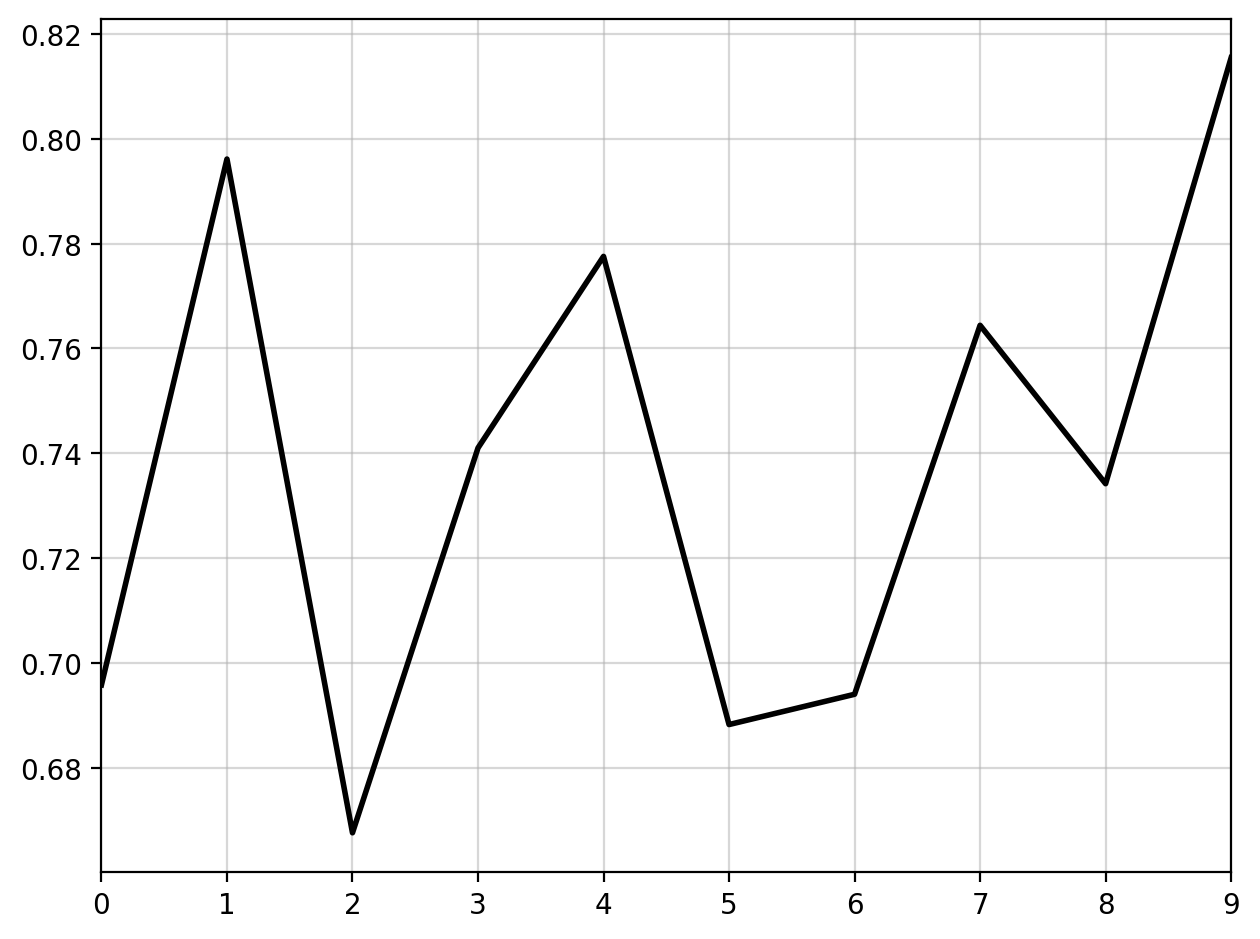

In [58]:
plt.clf()
plt.plot(utils.indicator_by_decile(df, 'log_income', 'expense_deposits_savings', 'weight'))
plt.show()

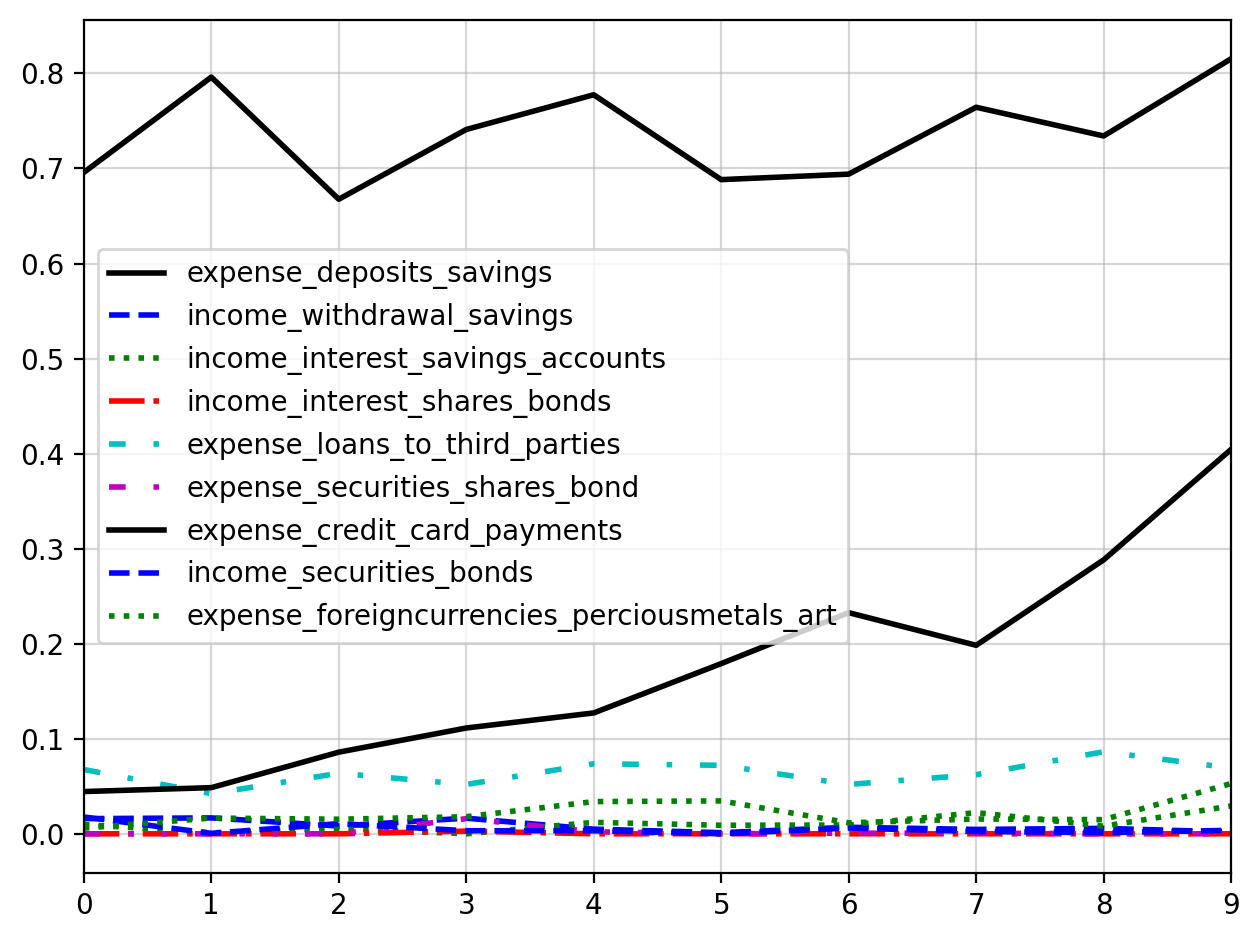

In [59]:
plt.clf()
for asset in liquid_assets:
    plt.plot(liquid_assets_by_decile[asset], label=asset)

plt.legend()
plt.show()

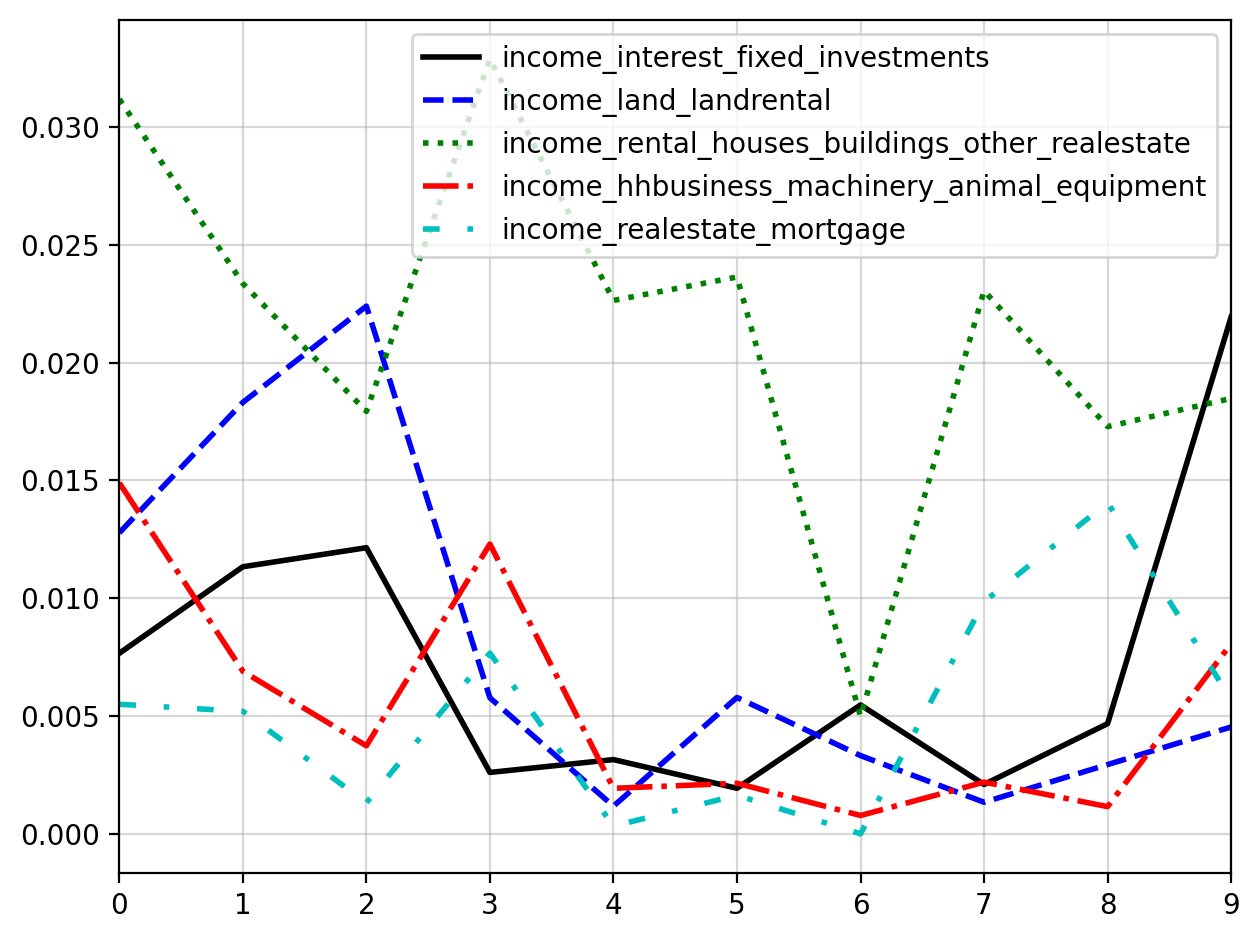

In [60]:
plt.clf()
for asset in illiquid_assets:
    plt.plot(illiquid_assets_by_decile[asset], label=asset)

plt.legend()
plt.show()

In [61]:
"""
income_by_decile = {}
for income_source in income.columns:
    income_by_decile[asset] = utils.indicator_by_decile(df, 'log_income', income_source, 'weight')

expense_by_decile = {}
for asset in illiquid_assets:
    expense_by_decile[asset] = utils.indicator_by_decile(df, 'log_income', asset, 'weight')
"""

"\nincome_by_decile = {}\nfor income_source in income.columns:\n    income_by_decile[asset] = utils.indicator_by_decile(df, 'log_income', income_source, 'weight')\n\nexpense_by_decile = {}\nfor asset in illiquid_assets:\n    expense_by_decile[asset] = utils.indicator_by_decile(df, 'log_income', asset, 'weight')\n"

In [62]:
import patsy
Z = 'age + I(age**2) + C(sex) + C(education) + C(hh_size) + C(location_size)'
X = patsy.dmatrix(Z, df, return_type='dataframe')

In [63]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = sm.GLM(df['expense_deposits_savings'], X, freq_weights=df['weight'], family=sm.families.Binomial())
fit = model.fit()

In [64]:
df['expense_deposits_savings_residualized'] = fit.resid_pearson
y = utils.indicator_by_decile(df, 'log_income', 'expense_deposits_savings_residualized', 'weight')
y_unresid = utils.indicator_by_decile(df, 'log_income', 'expense_deposits_savings', 'weight')

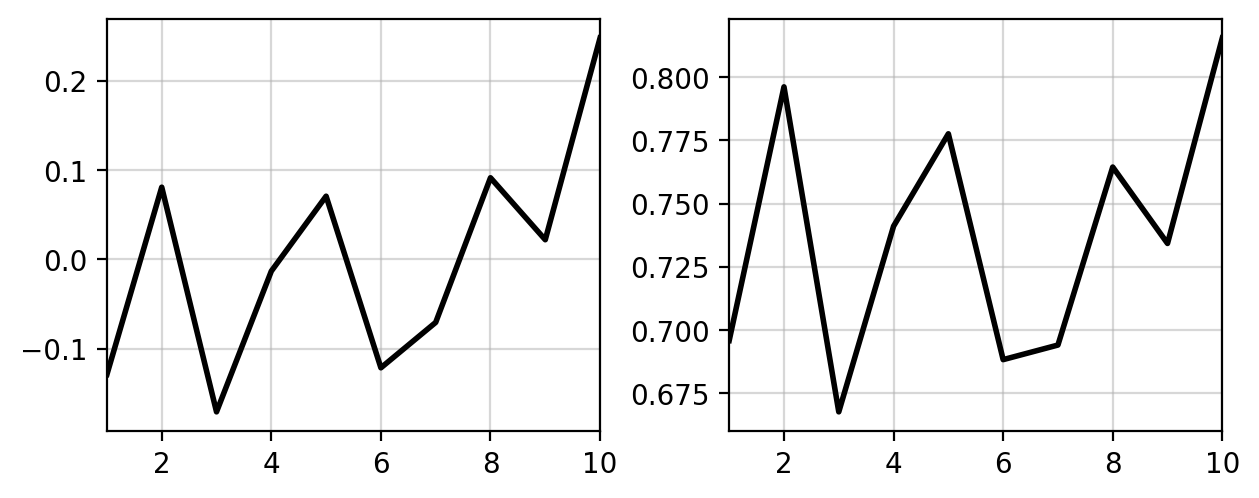

In [65]:
deciles = np.arange(1, 11)
plt.clf()
plt.subplot(221)
plt.plot(deciles, y)

plt.subplot(222)
plt.plot(deciles, y_unresid)
plt.show()

finding: residualizing the other y variable is critical
todo: apply this methodology to MFL